In [255]:
from PIL import ImageGrab
import time
import numpy as np
import cv2
import pandas as pd
from PIL import Image


Use bbox to only get a portion of the screen. It takes the following coordinates (x_start, y_start, x_end, y_end)

In [28]:
folder = 'screendumps/'
time.sleep(5)
images = []
SCREENWIDTH  = 288
SCREENHEIGHT = 512
x_start = 1230
y_start = 258
for i in range(20):
    time.sleep(0.0333)
    images.append(ImageGrab.grab(bbox=(x_start, y_start, x_start+SCREENWIDTH, y_start+SCREENHEIGHT))) #.save(dumpto, "JPEG")

print(len(images))
i = 1
for image in images:
    dumpto = folder + 'screen_capture_' + str(i) +'.jpg'
    image.save(dumpto, "JPEG")
    i +=1

20


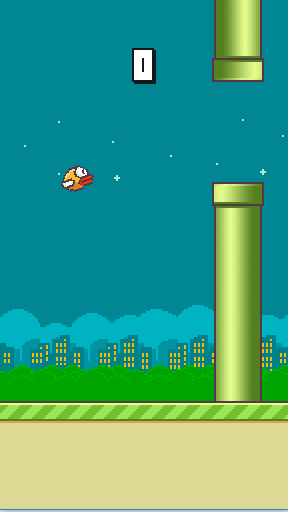

In [36]:
images[10]

In [42]:
a = np.array(images[15])

In [132]:
def convert_image_to_array(image):
    return np.array(image)

def convert_array_to_image(arr):
    return Image.fromarray(arr)

def process_image(image):
    processed_img = image
    # convert to gray
    processed_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # edge detection
    processed_img =  cv2.Canny(processed_img, threshold1 = 160, threshold2=300)
    return  processed_img

In [280]:
def process_image(image):
    arr = convert_image_to_array(image)
    # convert to gray
    processed_img = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)

    # edge detection
    processed_img =  cv2.Canny(arr, threshold1=160, threshold2=300)
    return processed_img

process_image(images[0]).shape

(512, 288)

In [ ]:
def process_img(image):
    img_arr = np.array(image)
    im

In [252]:
p = np.array(images[0])
q = np.dot(p, [0.299, 0.587, 0.114])

In [266]:
p = np.array(images[0].convert('LA'))
q = (p > 90)*255

In [256]:
q.shape

(512, 288)

In [274]:
i =Image.fromarray(q, mode='LA')

In [271]:
converted_images = []
for image in images:
    arr = convert_image_to_array(image)
    processed_img = process_image(arr)
    img = convert_array_to_image(processed_img)
    converted_images.append(img)

In [180]:
processed_img.shape

(512, 288)

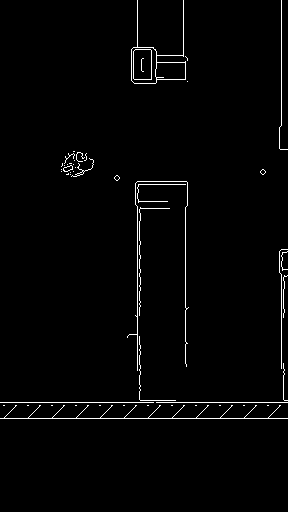

In [188]:
flattened_processe_image = processed_img.flatten()
reshaped_processed_image = np.reshape(flattened_processe_image, (512,288))
Image.fromarray(reshaped_processed_image)

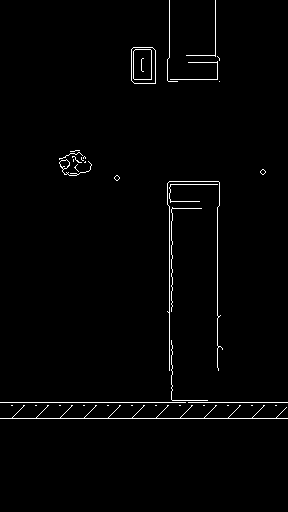

In [114]:
processed_img = process_image(a)
im = Image.fromarray(processed_img)
im

In [224]:
stacked_images = []
for i in range(0,len(converted_images),3):
    if i != 0:
        stacked = np.dstack(converted_images[i:i+3])
        stacked_images.append(stacked)

In [150]:
from keras.layers import Convolution2D
from keras.models import Sequential

In [230]:
stacked_images[0].shape

(512, 288, 3)

In [197]:
model = Sequential()
conv = Convolution2D(206, 144, 2,  activation='relu', input_shape=(512,288))
model.add(conv)
# model.add())

C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(206, (144, 2), activation="relu", input_shape=(512, 288))`
  from ipykernel import kernelapp as app


ValueError: Input 0 is incompatible with layer conv2d_9: expected ndim=4, found ndim=3